In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sys 
sys.path.append('C:Users/jkahn/Documents/Schmidt/cfl')

from cfl.util.find_xlbl_locations import rows_where_each_x_class_occurs

from run_cfl import load_data, run_cfl

# Run CFL 

All results from this run will be saved to cfl_test\experiment0010
verbose specified but not used by this block type
Training CFL pipeline.


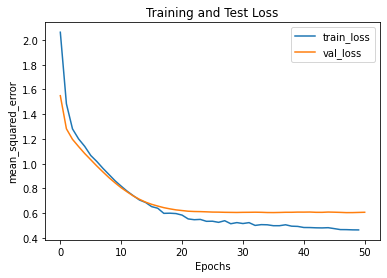

In [2]:
X, Y = load_data()

cfl_pipeline, results = run_cfl(X, Y) 

In [3]:
x_lbls= results['CDE']['pyx']

Notes

ANOVA 
- F-statistic = MST/MSE 

- MST = mean sum of squares due to treatment (variance of group from grand mean) (sum of squares deviations of group means from grand mean)

- MSE = mean sum of squares due to error (sum of squared deviations around the groups mean)

- No difference = F is 1 

- ANOVA is used to determine whether the means of groups are significantly different or not 



- I think what I want is not quite ANOVA, but rather examining the ratio of (sum of squared deviations from within-class mean)/n vs (sum of squared deviations from 0 for all samples)/N


for each question and macrovar class, find the variance within the class vs the global variance for the question
(also: consider making a histogram of the distribution of values within vs bt classes - will be a huge graph but could give additional insights)





In [4]:
## we only care about seeing the variance in the X data right now, since we're focused on cause-side clustering 

# create a Pd dataframe with macrovar in each row and questions in each column s

# calculate variance of questions (np.var, columnwise) for each macrovar class (use rows_where_each_xlbl_occurs) 

#plot the variance? 

# then calculate the global variance


# then create another table that shows the ratio of variance for each macrovar class to global variance for that variable 

In [5]:
# load X data as pd df 
X_df = pd.read_csv('X_questionnaire_0.csv', index_col=0)
X_df

,mf1c,mf2c,mf3c,mf4c,mf5c,mf6c,mf7c,mf8c,mf9c,mf10c,...,bc2c,bc3c,bc4c,bc5c,bc6c,bc7c,bc8c,bc9c,bc10c,bc11c
0,1,1,2,0,1,1,1,1,2,1,...,0,1,1,0,1,0,0,0,0,0
2,2,1,1,1,2,0,2,1,2,0,...,0,0,0,0,1,0,0,0,0,0
4,2,1,2,0,2,1,2,2,2,2,...,1,0,0,2,1,0,0,0,0,0
6,2,2,1,1,2,2,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0
8,2,2,1,1,1,1,0,2,1,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2,1,2,0,2,2,2,2,2,2,...,0,0,0,2,0,1,0,0,0,0
332,2,2,2,1,2,1,0,2,2,2,...,0,0,1,1,1,1,0,0,0,1
334,2,1,1,1,1,1,1,2,1,2,...,1,2,1,1,1,1,0,1,1,0
336,2,1,0,2,1,0,2,2,0,2,...,0,0,0,1,0,0,0,0,0,0


In [7]:
# create variance data frame 
# create a new df with the same columns as the original data set
class_var_df = X_df.iloc[0:0].copy(deep=True)


# append a new row with the mean value for each CFL class 
for macrovar, rows in zip(np.unique(x_lbls), rows_where_each_x_class_occurs(x_lbls)): 
    name = str(macrovar) + '_avg'
    var = np.var(X[rows], axis=1)
    class_var_df = class_var_df.append({name: var}, ignore_index=True) 
# variance takes a long time to calculate or is frozen 

NameError: name 'rows_where_each_x_class_occurs' is not defined